<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 24px; font-family: 'Verdana'; color: #3A405A; text-align: center;">
Welcome to this notebook!</p>
</div>

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9"> Importing libraries </span></b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Loading the csv file</span></b>

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Dropping unneccesary columns</span></b>

In [4]:
df.drop(columns=['id', 'CustomerId'], inplace=True)

In [5]:
df.drop('Surname',axis=1, inplace=True)

In [6]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0


In [7]:
df.shape

(165034, 11)

In [8]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Dataset information</span></b>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Extra Statistical measures</span></b>

In [10]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Checking null values</span></b>

In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Checking duplicates</span></b>

In [12]:
df.duplicated().sum()

123

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(164911, 11)

In [15]:
df.duplicated().sum()

0

<div style="background-color: #AAD7D9; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Data Pre-processing</p>
</div>

In [16]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0


#### We have two textual column in our dataset. So we have to convert it into numerical column

In [17]:
le=LabelEncoder()

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 18px; border-left: 8px solid #FF9800">Geography</span></b>

<Axes: xlabel='count', ylabel='Geography'>

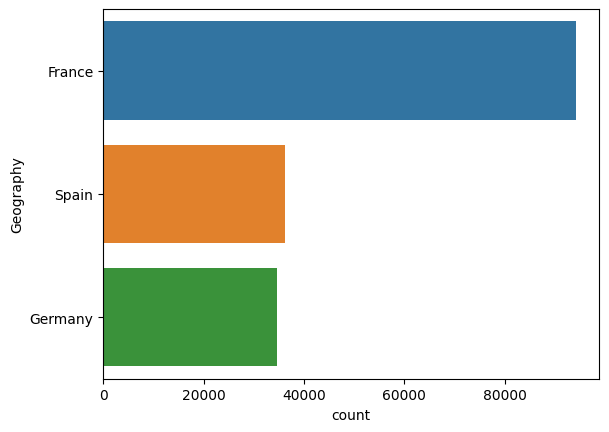

In [18]:
sn.countplot(y=df['Geography'])

In [19]:
df['Geography'].value_counts()

Geography
France     94132
Spain      36192
Germany    34587
Name: count, dtype: int64

In [20]:
df['Geography']=le.fit_transform(df['Geography'])

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 18px; border-left: 8px solid #FF9800">Gender</span></b>

<Axes: xlabel='Gender', ylabel='count'>

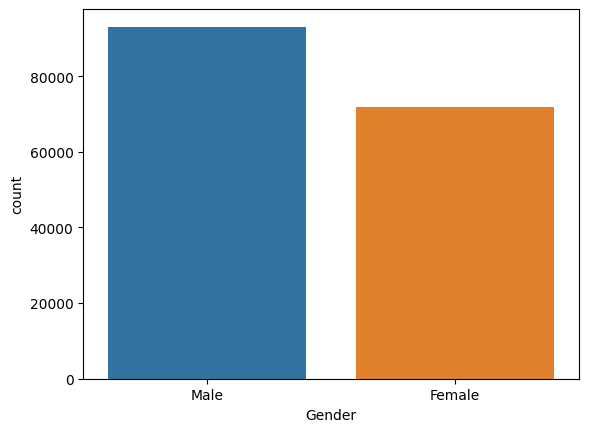

In [21]:
sn.countplot(x=df['Gender'])

In [22]:
df['Gender'].value_counts()

Gender
Male      93075
Female    71836
Name: count, dtype: int64

In [23]:
df['Gender']=le.fit_transform(df['Gender'])

In [24]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.0,2,1.0,0.0,181449.97,0


#### As you can see our dataset is ready to use.

<div style="background-color: #E0AED0; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Data Visualizations</p>
</div>

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 18px; border-left: 8px solid #FF9800">i) Heatmap</span></b>

In [25]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.005334,0.002250,-0.008832,0.000969,0.006880,0.011360,-0.002851,0.014944,-0.001866,-0.027541
Geography,0.005334,1.000000,-0.012055,0.034109,0.000197,0.134652,-0.025187,-0.016604,-0.003500,-0.004211,0.053225
Gender,0.002250,-0.012055,1.000000,-0.063287,0.008876,-0.014585,0.025934,0.006311,0.033834,-0.007794,-0.146469
Age,-0.008832,0.034109,-0.063287,1.000000,-0.010797,0.064426,-0.102274,-0.012282,0.003161,-0.005533,0.341009
Tenure,0.000969,0.000197,0.008876,-0.010797,1.000000,-0.009532,0.007387,0.005358,-0.005509,0.001082,-0.019557
Balance,0.006880,0.134652,-0.014585,0.064426,-0.009532,1.000000,-0.360986,-0.018569,-0.014984,0.008566,0.129669
NumOfProducts,0.011360,-0.025187,0.025934,-0.102274,0.007387,-0.360986,1.000000,0.005441,0.039741,-0.004322,-0.214598
HasCrCard,-0.002851,-0.016604,0.006311,-0.012282,0.005358,-0.018569,0.005441,1.000000,-0.021023,0.004581,-0.022141
IsActiveMember,0.014944,-0.003500,0.033834,0.003161,-0.005509,-0.014984,0.039741,-0.021023,1.000000,-0.008084,-0.210254
EstimatedSalary,-0.001866,-0.004211,-0.007794,-0.005533,0.001082,0.008566,-0.004322,0.004581,-0.008084,1.000000,0.018722


<Axes: >

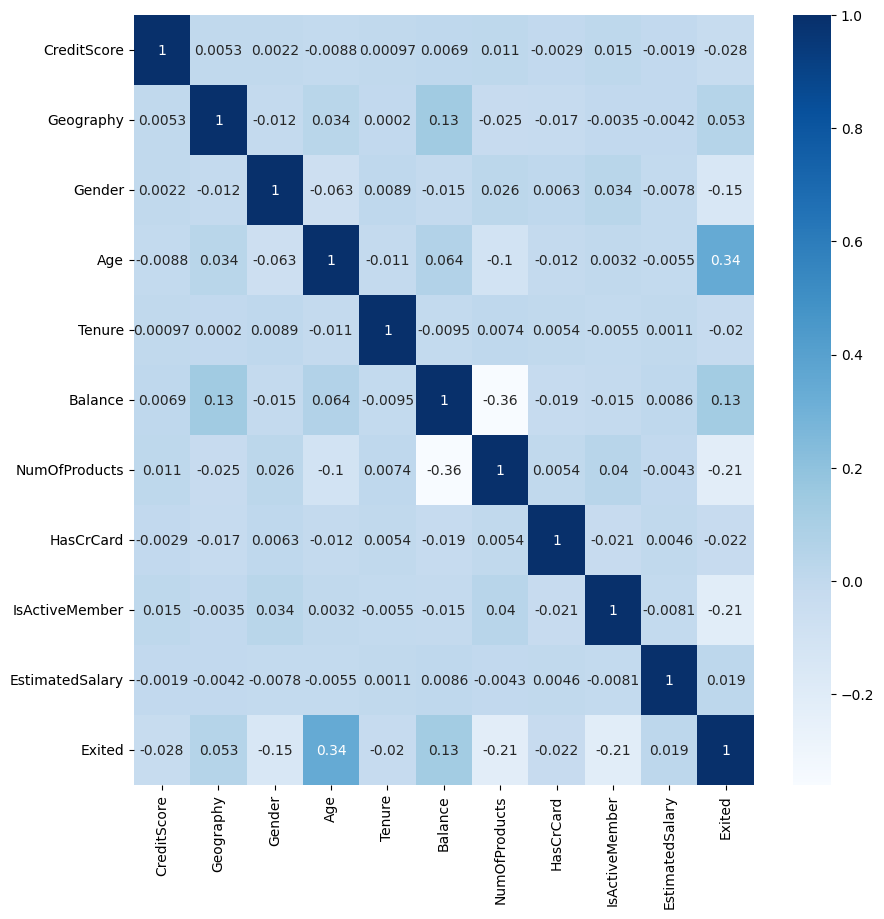

In [26]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(), annot=True, cmap='Blues')

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 18px; border-left: 8px solid #FF9800">ii) Histogram</span></b>

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Geography'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

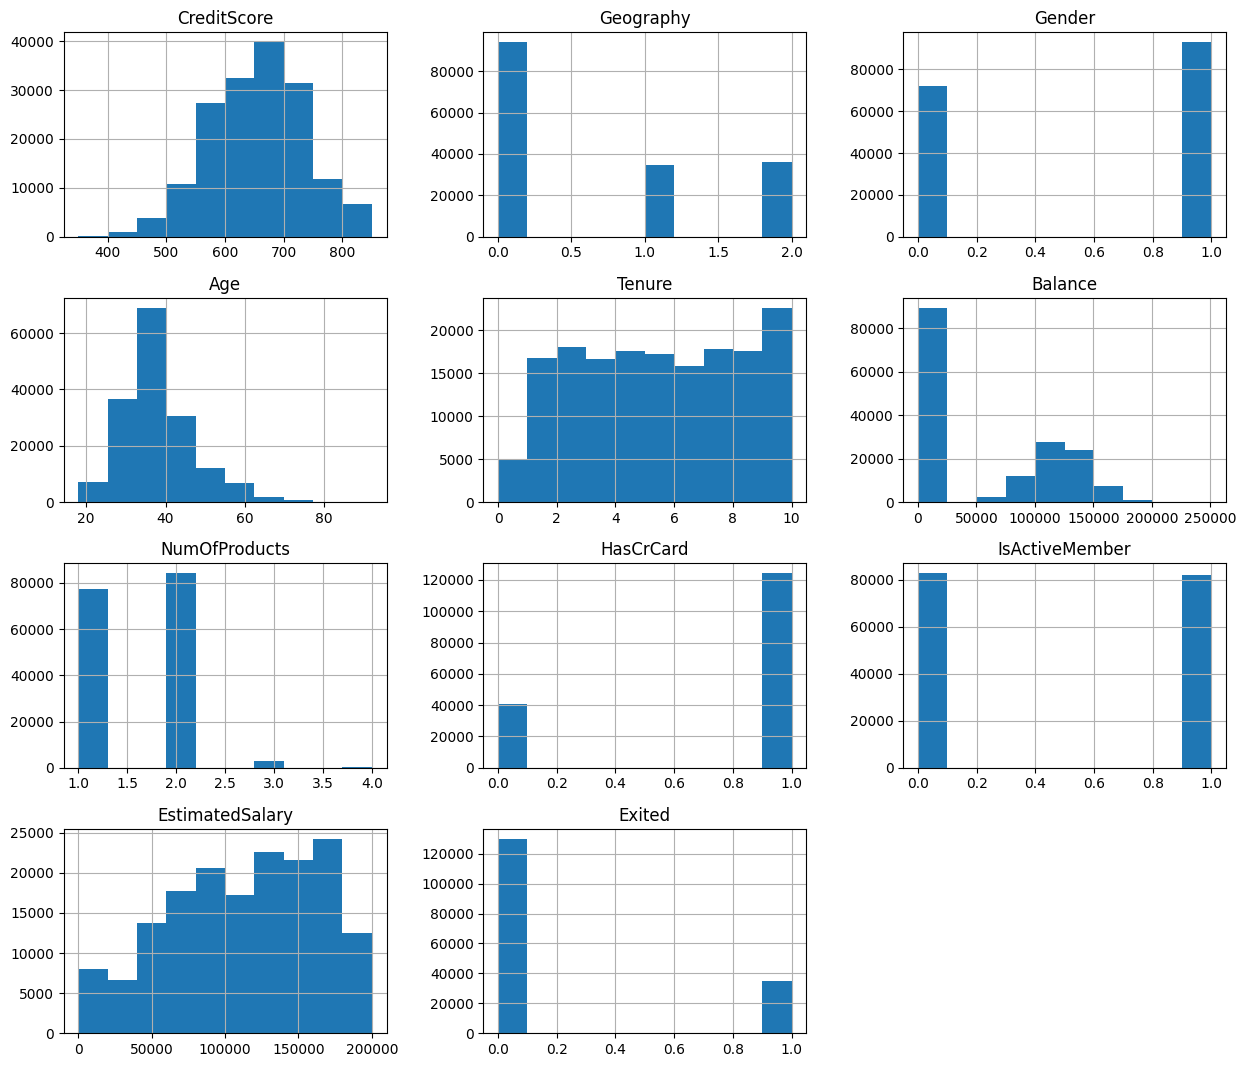

In [27]:
df.hist(figsize = (15, 13))

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 18px; border-left: 8px solid #FF9800">iii) Pairplot</span></b>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1500x1300 with 0 Axes>

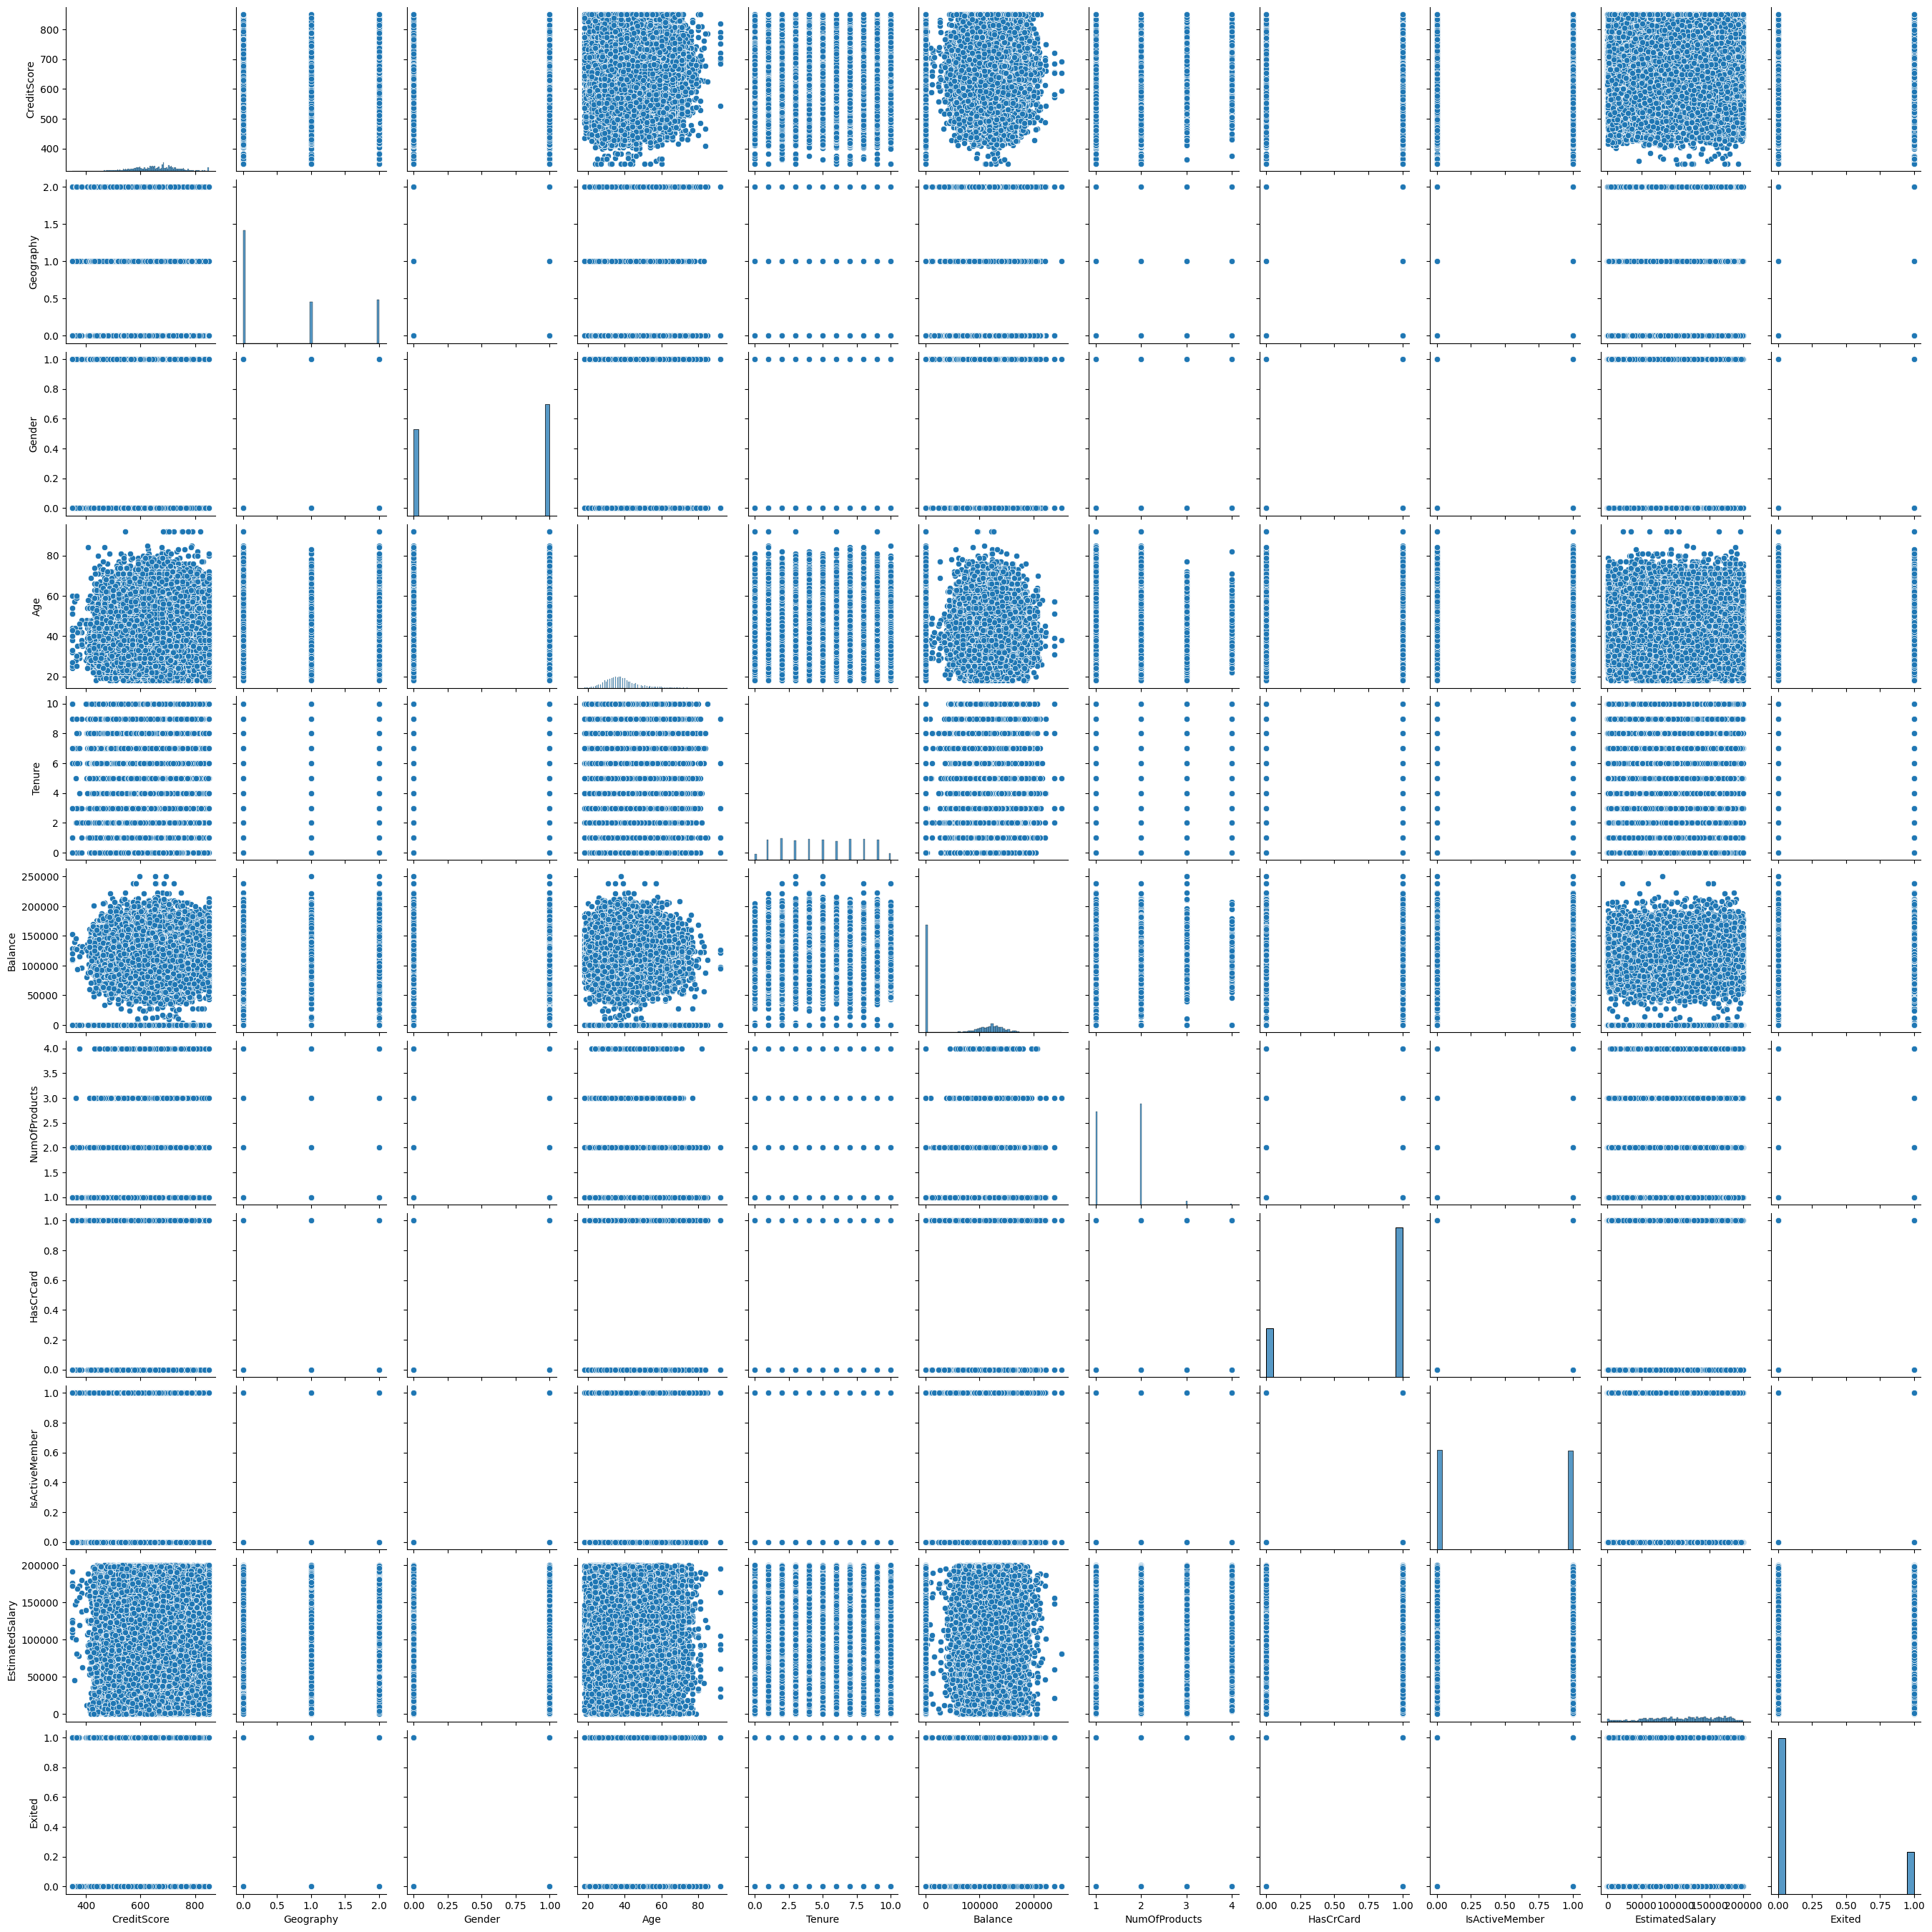

In [28]:
plt.figure(figsize=(15,13))
sn.pairplot(df)

<div style="background-color: #EA9085; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Train Test Split</p>
</div>

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 18px; border-left: 8px solid #FF9800">Labeled Column</span></b>

<Axes: xlabel='Exited', ylabel='count'>

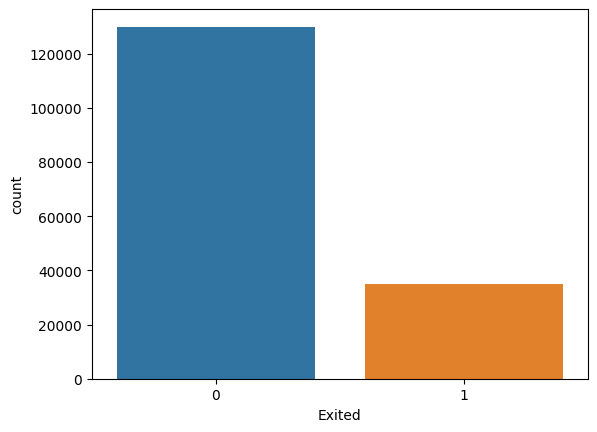

In [29]:
sn.countplot(x=df['Exited'])

In [30]:
df['Exited'].value_counts()

Exited
0    130002
1     34909
Name: count, dtype: int64

#### As you can see our labeled data column is not properly distirbuted. So we have to handle that later.

In [31]:
X=df.drop('Exited', axis=1)
Y=df['Exited']

In [32]:
print(X)

        CreditScore  Geography  Gender   Age  Tenure    Balance  \
0               668          0       1  33.0       3       0.00   
1               627          0       1  33.0       1       0.00   
2               678          0       1  40.0      10       0.00   
3               581          0       1  34.0       2  148882.54   
4               716          2       1  33.0       5       0.00   
...             ...        ...     ...   ...     ...        ...   
165029          667          2       0  33.0       2       0.00   
165030          792          0       1  35.0       3       0.00   
165031          565          0       1  31.0       5       0.00   
165032          554          2       0  30.0       7  161533.00   
165033          850          0       1  31.0       1       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                   2        1.0             0.0        181449.97  
1                   2        1.0             1.0         49

In [33]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 164911, dtype: int64


In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(164911, 10) (131928, 10) (32983, 10)


#### Scaling the data

In [36]:
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [37]:
X_train

array([[ 0.86895268, -0.7944962 ,  0.87796462, ...,  0.57102493,
         1.00461924,  0.67647361],
       [ 1.48026021,  1.65491187,  0.87796462, ...,  0.57102493,
         1.00461924,  1.21586505],
       [-0.36613806, -0.7944962 ,  0.87796462, ...,  0.57102493,
        -0.995402  ,  0.37141663],
       ...,
       [-0.77783498,  1.65491187,  0.87796462, ..., -1.75123701,
         1.00461924, -2.21254297],
       [ 0.95628232, -0.7944962 , -1.13899807, ..., -1.75123701,
         1.00461924, -0.50984798],
       [-0.29128408, -0.7944962 ,  0.87796462, ...,  0.57102493,
        -0.995402  ,  1.43162084]])

#### Now we have to handle our Labeled column to make the same distribution.

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 18px; border-left: 8px solid #FF9800">Balancing both the classes using the RandomOverSampler</span></b>

In [38]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)
# We will pass to it the output from train data
X_train_resampled, Y_train_resampled = sampler.fit_resample(
    X_train, Y_train)

<Axes: xlabel='Exited'>

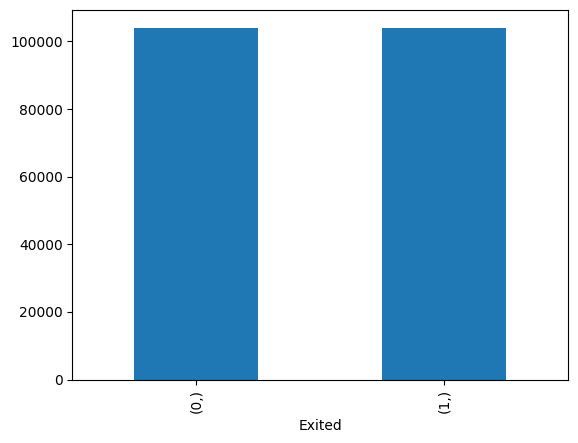

In [39]:
pd.DataFrame(Y_train_resampled).value_counts().plot(kind="bar")

#### As you can see the Labeled Data is distributed properly

<div style="background-color: #F6B17A; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Model Training</p>
</div>

<b><span style="color: #3C0753; background-color:#A1EEBD; padding: 20px; font-size: 18px; border-left: 8px solid F037A5">i) Logistic Regression</span></b>

In [40]:
lr=LogisticRegression(C=1000,solver="sag",tol=0.001,max_iter=500,random_state=15)
lr.fit(X_train_resampled, Y_train_resampled)

LogisticRegression(C=1000, max_iter=500, random_state=15, solver='sag',
                   tol=0.001)

#### Accuracies

In [41]:
print("Train Accuracy: ", lr.score(X_train_resampled, Y_train_resampled))
print("Test Accuracy: ", lr.score(X_test, Y_test))

Train Accuracy:  0.7395260791021255
Test Accuracy:  0.7404420459024346


#### Confusion Matrix

<Axes: >

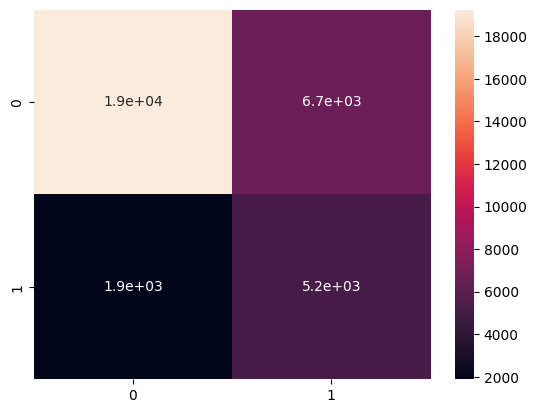

In [42]:
y_pred=lr.predict(X_test)
conf=confusion_matrix(Y_test, y_pred)

sn.heatmap(conf, annot=True)

#### Classification Report

In [43]:
y_pred=lr.predict(X_test)
report=classification_report(Y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.91      0.74      0.82     25934
           1       0.44      0.73      0.55      7049

    accuracy                           0.74     32983
   macro avg       0.67      0.74      0.68     32983
weighted avg       0.81      0.74      0.76     32983



<b><span style="color: #3C0753; background-color:#A1EEBD; padding: 20px; font-size: 18px; border-left: 8px solid F037A5">ii) Random Forest</span></b>

In [44]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled,Y_train_resampled)

RandomForestClassifier(random_state=42)

#### Accuracies

In [45]:
print("Train Accuracy: ", rf.score(X_train_resampled, Y_train_resampled))
print("Test Accuracy: ", rf.score(X_test, Y_test))

Train Accuracy:  0.9998366452704002
Test Accuracy:  0.8470424157899524


#### Confusion matrix

<Axes: >

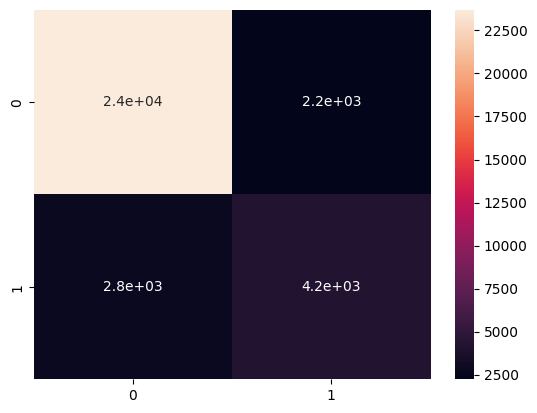

In [46]:
y_pred=rf.predict(X_test)
conf=confusion_matrix(Y_test, y_pred)

sn.heatmap(conf, annot=True)

#### Classification report

In [47]:
y_pred=rf.predict(X_test)
report=classification_report(Y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     25934
           1       0.66      0.60      0.63      7049

    accuracy                           0.85     32983
   macro avg       0.77      0.76      0.77     32983
weighted avg       0.84      0.85      0.84     32983



<b><span style="color: #3C0753; background-color:#A1EEBD; padding: 20px; font-size: 18px; border-left: 8px solid F037A5">iii) Decision Trees</span></b>

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train_resampled,Y_train_resampled)

DecisionTreeClassifier()

### Accuracies

In [49]:
print("Train Accuracy: ", dt.score(X_train_resampled, Y_train_resampled))
print("Test Accuracy: ", dt.score(X_test, Y_test))

Train Accuracy:  0.9998462543721413
Test Accuracy:  0.7968044143952946


#### Confusion Matrix

<Axes: >

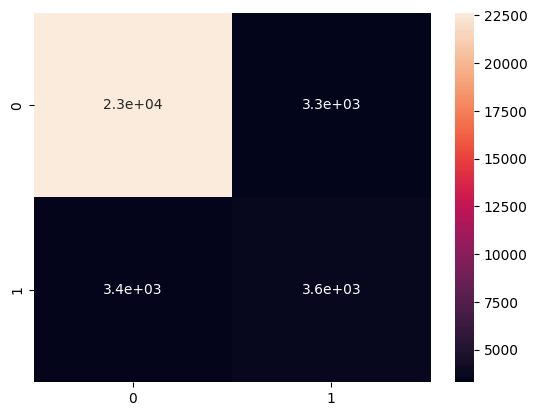

In [50]:
y_pred=dt.predict(X_test)
conf=confusion_matrix(Y_test, y_pred)

sn.heatmap(conf, annot=True)

#### Classification report

In [51]:
y_pred=dt.predict(X_test)
report1=classification_report(Y_test, y_pred)

print(report1)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     25934
           1       0.53      0.52      0.52      7049

    accuracy                           0.80     32983
   macro avg       0.70      0.69      0.70     32983
weighted avg       0.80      0.80      0.80     32983



<b><span style="color: #3C0753; background-color:#A1EEBD; padding: 20px; font-size: 18px; border-left: 8px solid F037A5">iv) XG Boost</span></b>

In [52]:
xgb = XGBClassifier()
xgb.fit(X_train_resampled,Y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### Accuracies

In [53]:
print("Train Accuracy: ", xgb.score(X_train_resampled, Y_train_resampled))
print("Test Accuracy: ", xgb.score(X_test, Y_test))

Train Accuracy:  0.8438376830533881
Test Accuracy:  0.8120546948427978


#### Confusion Matrix

<Axes: >

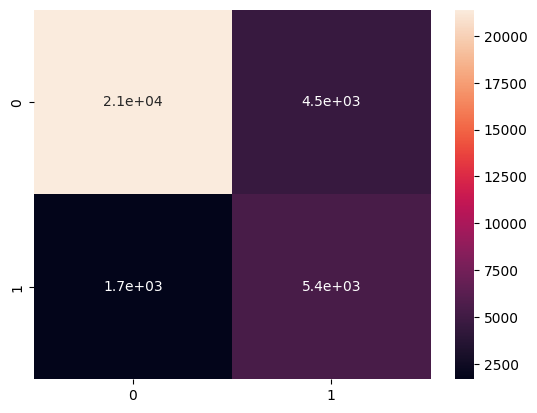

In [54]:
y_pred=xgb.predict(X_test)
conf=confusion_matrix(Y_test, y_pred)

sn.heatmap(conf, annot=True)

#### Classification report

In [55]:
y_pred=xgb.predict(X_test)
report1=classification_report(Y_test, y_pred)

print(report1)

              precision    recall  f1-score   support

           0       0.93      0.83      0.87     25934
           1       0.54      0.76      0.63      7049

    accuracy                           0.81     32983
   macro avg       0.74      0.79      0.75     32983
weighted avg       0.85      0.81      0.82     32983



<b><span style="color: #3C0753; background-color:#9BB8CD; padding: 20px; font-size: 18px; border-left: 8px solid F037A5">v) Light Gradient Boosting Machine</span></b>

#### LightGBM is a gradient boosting framework that uses tree based learning algorithms.

#### It is designed to be distributed and efficient with the following advantages -->

- **Faster training speed and higher efficiency.**
- **Lower memory usage.**
- **Better accuracy.**
- **Support of parallel, distributed, and GPU learning.**
- **Capable of handling large-scale data.**

In [56]:
lgb = LGBMClassifier()
lgb.fit(X_train_resampled,Y_train_resampled)

LGBMClassifier()

#### Accuracies

In [57]:
print("Train Accuracy: ", lgb.score(X_train_resampled, Y_train_resampled))
print("Test Accuracy: ", lgb.score(X_test, Y_test))

Train Accuracy:  0.817398239612561
Test Accuracy:  0.8098414334657248


#### Confusion Matrix

<Axes: >

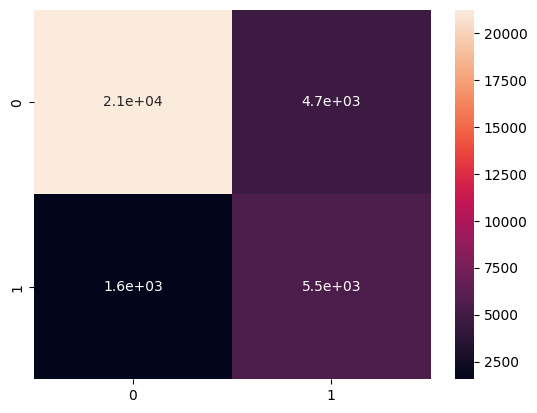

In [58]:
y_pred=lgb.predict(X_test)
conf=confusion_matrix(Y_test, y_pred)

sn.heatmap(conf, annot=True)

#### Classification Report

In [59]:
y_pred=lgb.predict(X_test)
report1=classification_report(Y_test, y_pred)

print(report1)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     25934
           1       0.54      0.78      0.64      7049

    accuracy                           0.81     32983
   macro avg       0.73      0.80      0.75     32983
weighted avg       0.85      0.81      0.82     32983



<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; text-align: center;">
Based on the accuracy and performance , we are considering our model as LightGBM.</p>
</div>

-------------------------------------------------------------------------------------------------------

<div style="background-color:  #FFF8C9; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">For Kaggle submissions</p>
</div>

**Loading the test data for predictions**

In [60]:
test_data=pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [61]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [62]:
# Dropping unnecessary columns
test_data.drop(columns=['CustomerId','Surname','id'],axis=1, inplace=True)

In [63]:
test_data.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.0,2,0.0,1.0,160976.75


In [64]:
test_data.shape

(110023, 10)

In [65]:
test_data['Gender']=le.fit_transform(test_data['Gender'])
test_data['Geography']=le.fit_transform(test_data['Geography'])

In [66]:
test_data=sc.transform(test_data)

In [67]:
test_data

array([[-0.87764029, -0.7944962 , -1.13899807, ..., -1.75123701,
         1.00461924,  0.96111542],
       [ 0.33249912, -0.7944962 , -1.13899807, ...,  0.57102493,
        -0.995402  , -0.79601767],
       [-0.00434381, -0.7944962 , -1.13899807, ...,  0.57102493,
        -0.995402  ,  0.52207477],
       ...,
       [ 0.69429338, -0.7944962 ,  0.87796462, ...,  0.57102493,
        -0.995402  , -1.91399173],
       [ 0.65686639, -0.7944962 , -1.13899807, ...,  0.57102493,
         1.00461924,  0.91819091],
       [-0.44099205, -0.7944962 , -1.13899807, ...,  0.57102493,
        -0.995402  , -1.75655106]])

In [68]:
y_pred=lgb.predict(test_data)

y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [69]:
y_pred=pd.DataFrame(y_pred)

y_pred

,0
0,0
1,1
2,0
3,1
4,1
...,...
110018,0
110019,0
110020,0
110021,0


<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; text-align: center;">
Saving the prediction for submission</p>
</div>

In [70]:
submit=pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

submit.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


<b><span style="color: #3C0753; background-color:#FFF8C9; padding: 20px; font-size: 18px; border-left: 8px solid F037A5">As per format in kaggle submission,we need Id and Exited columns</span></b>

In [71]:
sub = pd.concat([submit.id,y_pred],axis=1)

In [72]:
sub.rename(columns={0:'Exited'},inplace=True)

In [73]:
sub.to_csv('submission.csv',index=False)

In [74]:
sub

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,1
4,165038,1
...,...,...
110018,275052,0
110019,275053,0
110020,275054,0
110021,275055,0
